In [1]:
import cv2
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import Dependency
import Parameters

In [2]:
def stratification(raw=np.zeros(shape=(100, 2000))):
    age_stratification = np.zeros(shape=(16, 2000))
    for i in range(15):
        age_stratification[i] = np.sum(raw[5*i:5 * (i+1)], axis=0) / 5
    age_stratification[15] = np.sum(raw[74:], axis=0) / 25
    return age_stratification.T

In [3]:
one_dose_raw = np.zeros(shape=(2000, 100), dtype=float)
two_dose_raw = np.zeros(shape=(2000, 100), dtype=float)
three_dose_raw = np.zeros(shape=(2000, 100), dtype=float)

In [4]:
two_dose_raw_18_44 = np.zeros(shape=(2000, ))
two_dose_raw_45_65 = np.zeros(shape=(2000, ))
two_dose_raw_65_100 = np.zeros(shape=(2000, ))

three_dose_raw_18_44 = np.zeros(shape=(2000, ))
three_dose_raw_45_65 = np.zeros(shape=(2000, ))
three_dose_raw_65_100 = np.zeros(shape=(2000, ))

In [5]:
two_dose_raw_18_44[0:60] = 0.58
two_dose_raw_18_44[60:120] = 0.56
two_dose_raw_18_44[120:180] = 0.46
two_dose_raw_18_44[180:240] = 0.38
two_dose_raw_18_44[240:300] = 0.49
two_dose_raw_18_44[300:360] = 0.30
two_dose_raw_18_44[360:420] = 0.20
two_dose_raw_18_44[420:480] = 0.17

two_dose_raw_45_65[0:60] = 0.75
two_dose_raw_45_65[60:120] = 0.54
two_dose_raw_45_65[120:180] = 0.65
two_dose_raw_45_65[180:240] = 0.57
two_dose_raw_45_65[240:300] = 0.58
two_dose_raw_45_65[300:360] = 0.33
two_dose_raw_45_65[360:420] = 0.33
two_dose_raw_45_65[420:480] = -0.22

two_dose_raw_65_100[0:60] = 0.77
two_dose_raw_65_100[60:120] = 0.68
two_dose_raw_65_100[120:180] = 0.53
two_dose_raw_65_100[180:240] = 0.47
two_dose_raw_65_100[240:300] = 0.46
two_dose_raw_65_100[300:360] = 0.59
two_dose_raw_65_100[360:420] = 0.45
two_dose_raw_65_100[420:480] = 0.31
two_dose_raw_65_100[420:480] = 0.35

In [6]:
three_dose_raw_18_44[0:60] = 0.85
three_dose_raw_18_44[60:120] = 0.77
three_dose_raw_18_44[120:180] = 0.33
three_dose_raw_18_44[180:240] = 0.52
three_dose_raw_18_44[240:300] = -0.24
three_dose_raw_18_44[300:360] = -0.68

three_dose_raw_45_65[0:60] = 0.89
three_dose_raw_45_65[60:120] = 0.83
three_dose_raw_45_65[120:180] = 0.58
three_dose_raw_45_65[180:240] = 0.47
three_dose_raw_45_65[240:300] = 0.52
three_dose_raw_45_65[300:360] = 0.0

three_dose_raw_65_100[0:60] = 0.89
three_dose_raw_65_100[60:120] = 0.87
three_dose_raw_65_100[120:180] = 0.70
three_dose_raw_65_100[180:240] = 0.52
three_dose_raw_65_100[240:300] = 0.45
three_dose_raw_65_100[300:360] = 0.27

## Unadjusted

In [7]:
two_dose_raw_18_44[0:60] = 0.58
two_dose_raw_18_44[60:120] = 0.56
two_dose_raw_18_44[120:180] = 0.46
two_dose_raw_18_44[180:240] = 0.38
two_dose_raw_18_44[240:300] = 0.49
two_dose_raw_18_44[300:360] = 0.30
two_dose_raw_18_44[360:420] = 0.20
two_dose_raw_18_44[420:480] = 0.17

two_dose_raw_45_65[0:60] = 0.75
two_dose_raw_45_65[60:120] = 0.54
two_dose_raw_45_65[120:180] = 0.65
two_dose_raw_45_65[180:240] = 0.57
two_dose_raw_45_65[240:300] = 0.58
two_dose_raw_45_65[300:360] = 0.33
two_dose_raw_45_65[360:420] = 0.33
two_dose_raw_45_65[420:480] = -0.22

two_dose_raw_65_100[0:60] = 0.77
two_dose_raw_65_100[60:120] = 0.68
two_dose_raw_65_100[120:180] = 0.53
two_dose_raw_65_100[180:240] = 0.47
two_dose_raw_65_100[240:300] = 0.46
two_dose_raw_65_100[300:360] = 0.59
two_dose_raw_65_100[360:420] = 0.45
two_dose_raw_65_100[420:480] = 0.31
two_dose_raw_65_100[420:480] = 0.35

In [8]:
three_dose_raw_18_44[0:60] = 0.85
three_dose_raw_18_44[60:120] = 0.77
three_dose_raw_18_44[120:180] = 0.33
three_dose_raw_18_44[180:240] = 0.52
three_dose_raw_18_44[240:300] = -0.24
three_dose_raw_18_44[300:360] = -0.68

three_dose_raw_45_65[0:60] = 0.89
three_dose_raw_45_65[60:120] = 0.83
three_dose_raw_45_65[120:180] = 0.58
three_dose_raw_45_65[180:240] = 0.47
three_dose_raw_45_65[240:300] = 0.52
three_dose_raw_45_65[300:360] = 0.0

three_dose_raw_65_100[0:60] = 0.89
three_dose_raw_65_100[60:120] = 0.87
three_dose_raw_65_100[120:180] = 0.70
three_dose_raw_65_100[180:240] = 0.52
three_dose_raw_65_100[240:300] = 0.45
three_dose_raw_65_100[300:360] = 0.27

In [9]:
filtered_two_18_44 = cv2.GaussianBlur(two_dose_raw_18_44.reshape(2000, 1), (401, 401), 0)
filtered_two_45_65 = cv2.GaussianBlur(two_dose_raw_45_65.reshape(2000, 1), (401, 401), 0)
filtered_two_65_100 = cv2.GaussianBlur(two_dose_raw_65_100.reshape(2000, 1), (401, 401), 0)

filtered_three_18_44 = cv2.GaussianBlur(three_dose_raw_18_44.reshape(2000, 1), (401, 401), 0)
filtered_three_45_65 = cv2.GaussianBlur(three_dose_raw_45_65.reshape(2000, 1), (401, 401), 0)
filtered_three_65_100 = cv2.GaussianBlur(three_dose_raw_65_100.reshape(2000, 1), (401, 401), 0)

(<AxesSubplot: >, [<matplotlib.lines.Line2D at 0x1cfa8277d90>])

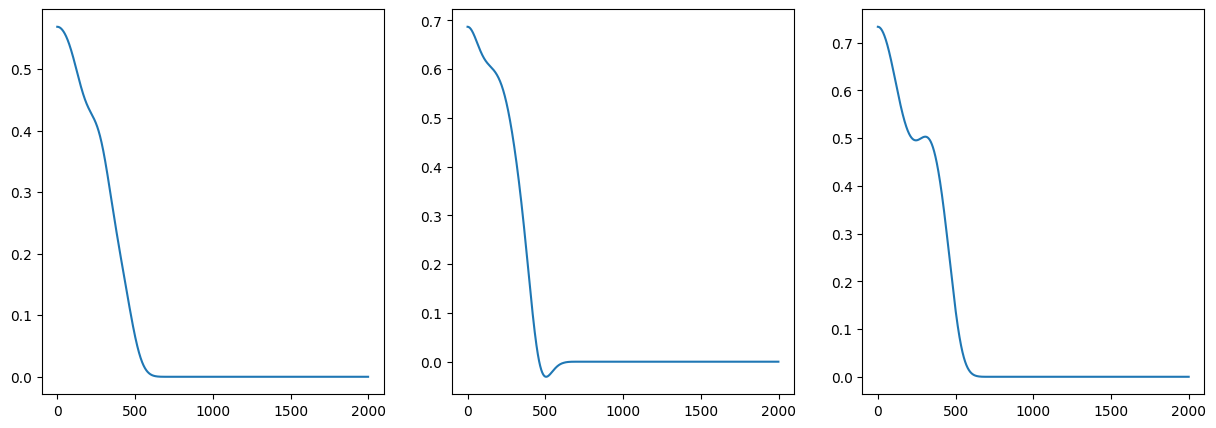

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1), plt.plot(filtered_two_18_44)
plt.subplot(1, 3, 2), plt.plot(filtered_two_45_65)
plt.subplot(1, 3, 3), plt.plot(filtered_two_65_100)

(<AxesSubplot: >, [<matplotlib.lines.Line2D at 0x1cfa83217f0>])

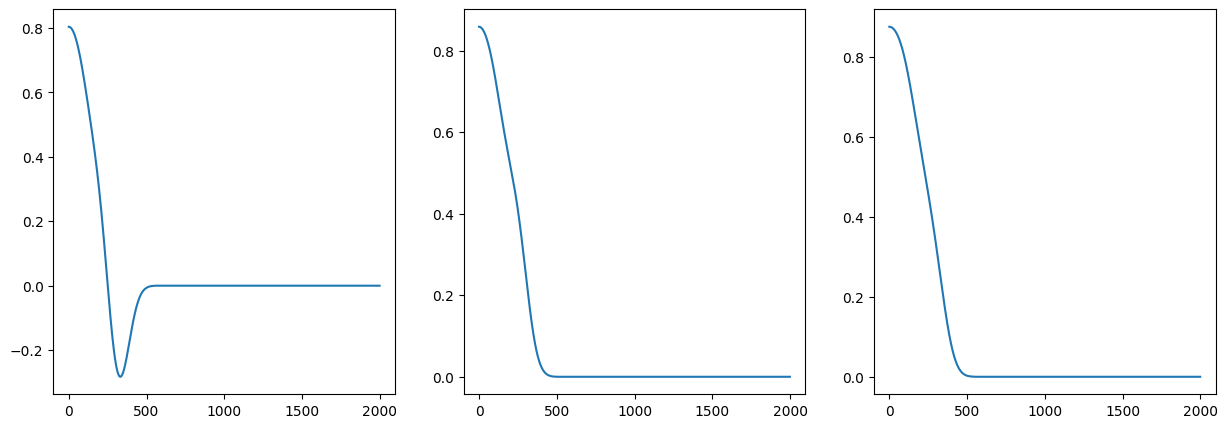

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1), plt.plot(filtered_three_18_44)
plt.subplot(1, 3, 2), plt.plot(filtered_three_45_65)
plt.subplot(1, 3, 3), plt.plot(filtered_three_65_100)

In [12]:
print(two_dose_raw.shape)
two_dose_raw= two_dose_raw.T
two_dose_raw[0:44] = filtered_two_18_44.reshape(2000,)
two_dose_raw[45:65] = filtered_two_45_65.reshape(2000,)
two_dose_raw[65:100] = filtered_two_65_100.reshape(2000,)
two_dose_raw= two_dose_raw.T

(2000, 100)


In [13]:
print(three_dose_raw.shape)
three_dose_raw= three_dose_raw.T
three_dose_raw[0:44] = filtered_three_18_44.reshape(2000,)
three_dose_raw[45:65] = filtered_three_45_65.reshape(2000,)
three_dose_raw[65:100] = filtered_three_65_100.reshape(2000,)
three_dose_raw= three_dose_raw.T

(2000, 100)


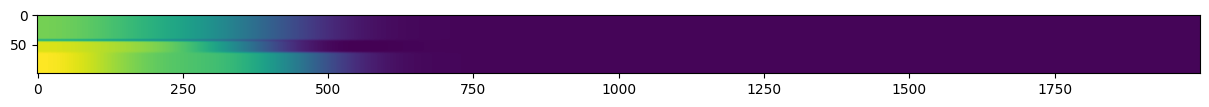

In [14]:
plt.figure(figsize=(15,10))
two_dose =  cv2.GaussianBlur(two_dose_raw.T, (401, 7), 0)
plt.imshow(two_dose)

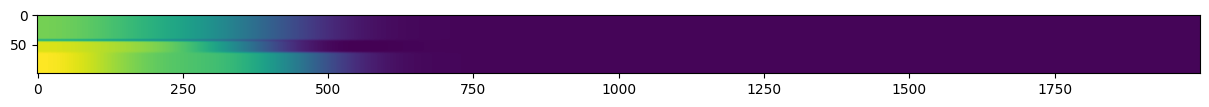

In [15]:
plt.figure(figsize=(15,10))
three_dose =  cv2.GaussianBlur(three_dose_raw.T, (401, 7), 0)
plt.imshow(two_dose)

In [16]:
print(two_dose.T.shape)
stratified_two_dose = stratification(two_dose)

(2000, 100)


In [17]:
print(two_dose.T.shape)
stratified_three_dose = stratification(three_dose)

(2000, 100)


(<AxesSubplot: >,
  <matplotlib.lines.Line2D at 0x1cfa8540040>])

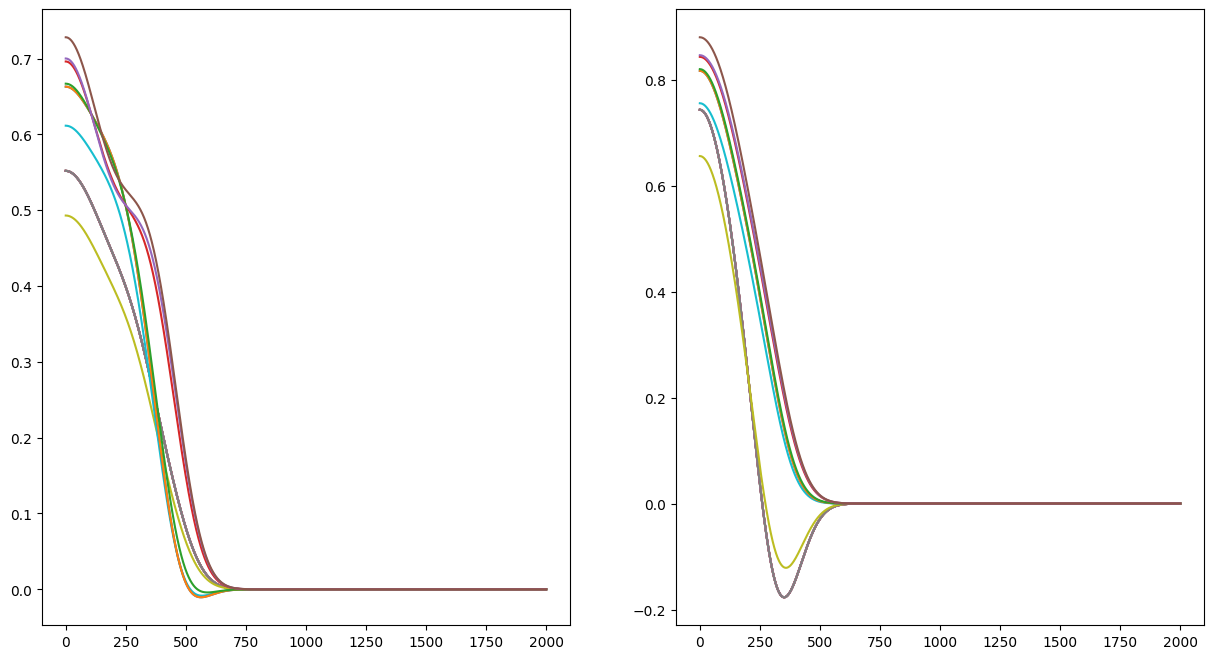

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1), plt.plot(stratified_two_dose)
plt.subplot(1, 2, 2), plt.plot(stratified_three_dose)

In [19]:
path = os.getcwd()[:-5] + 'Model Dependencies/'
two_dose_df = pd.DataFrame(stratified_two_dose, columns=Parameters.AGE_BANDS)
three_dose_df = pd.DataFrame(stratified_three_dose, columns=Parameters.AGE_BANDS)

print(path)

two_dose_df.to_csv(path_or_buf=path+'two_dose.csv')
three_dose_df.to_csv(path_or_buf=path+'three_dose.csv')

D:\Github\Commuting_TSF_SARS-Cov-2_model_master\Model Dependencies/


(2000, 16)


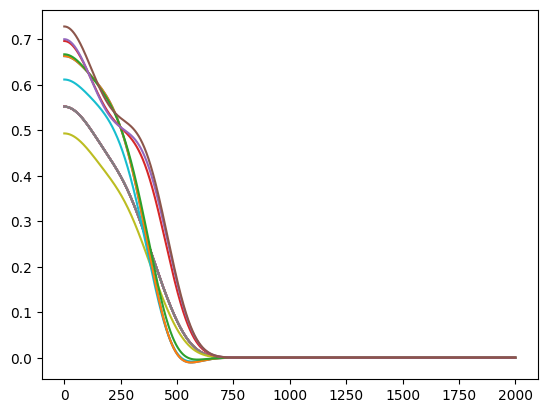

In [20]:
df = pd.read_csv(path+'two_dose.csv', delimiter=',')
array = df.to_numpy().T[1:17].T
print(array.shape)
plt.plot(array)